<a href="https://colab.research.google.com/github/magno12345/npl-coder/blob/main/Mc_Donalds_reviews_SOTELO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introducción y Presentación del Problema



1.   Descripcion del Problema.



*   El objetivo de este proyecto es analizar las opiniones de los clientes sobre las tiendas de McDonald's en los Estados Unidos utilizando un dataset de más de 33,000 reseñas anónimas obtenidas de Google reviews.









2.   Contexto :


*   Entender las opiniones y experiencias de los clientes es crucial para mejorar la calidad del servicio y la satisfacción del cliente en las tiendas de McDonald's. Las reseñas en línea proporcionan una fuente rica de información para analizar estos aspectos.





#Objetivos del proyecto



1.   Objetivo General :

*   Desarrollar un modelo que pueda clasificar automáticamente las reseñas de McDonald's como positivas, negativas o neutrales.



2.   Objetivos especificos :


*   Recolectar y preprocesar el dataset de reseñas de McDonald's.

*   Entrenar modelos de NLP para el análisis de sentimientos utilizando Bag of Words, TF-IDF y Word Embedding.

*   Evaluar el rendimiento de los modelos utilizando métricas adecuadas.

*   Identificar las principales tendencias y patrones en las opiniones de los clientes.






#Justificacion y Relevancia.


*   Este análisis permitirá a McDonald's identificar áreas de mejora en sus servicios y productos, así como comprender mejor las expectativas y necesidades de sus clientes. Esto, a su vez, puede ayudar a mejorar la satisfacción del cliente y la fidelidad a la marca.




#Metodologia

1.   Recoleccion de datos:


*   Limpieza de datos y preparación (eliminación de duplicados, stopwords, tokenización, lematización).


2.   Representacion de textos:


*   Convertir los textos a representaciones numéricas usando:
*   Bag of Words (BoW)
*   TF-IDF
*   Word Embedding


3.   Entrenamiento de modelos:
* Entrenar modelos de clasificación (Naive Bayes, SVM, Deep Learning) usando las representaciones numéricas.
4.   Evaluacion de modelos:

*  Medir el rendimiento del modelo con métricas como precisión, recall, y F1-score
5.   Implementacion y Despliegue:
* Desplegar el modelo y preparar un informe con los resultados.



##Carga y preprocesamiento de datos.

Usaré las columnas review y rating para entrenar y evaluar el modelo de análisis de sentimientos, donde review contendrá el texto de las reseñas que se analizará para identificar el sentimiento, y rating proporcionará las etiquetas de sentimiento que servirán como referencia para el entrenamiento y validación del modelo.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


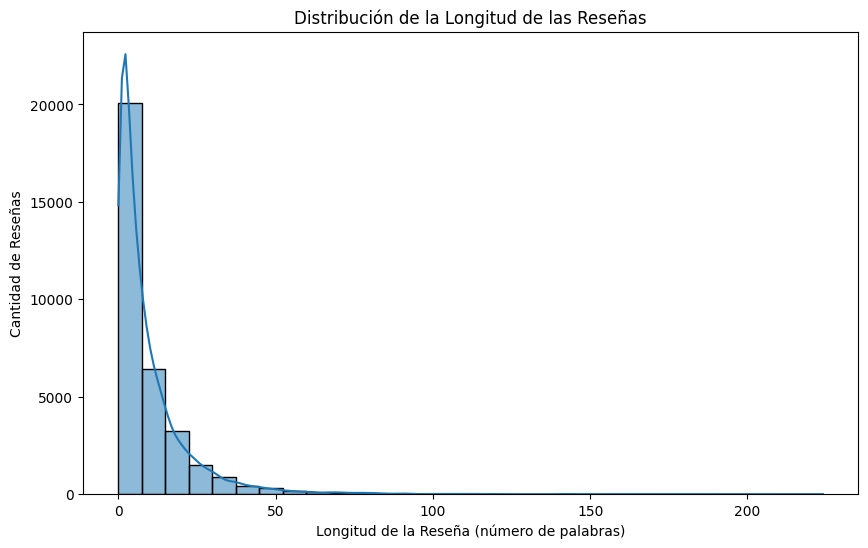

In [5]:
import pandas as pd
import requests
import chardet
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from wordcloud import WordCloud
from collections import Counter

# Descargar y cargar el archivo CSV
url = 'https://drive.google.com/uc?export=download&id=1y6PL5DcAjNc7mrmRDiDbFO8mBiPkCel3'
response = requests.get(url)
content = response.content

# Detectar la codificación
result = chardet.detect(content)
encoding = result['encoding']

# Leer el archivo CSV con la codificación detectada
df = pd.read_csv(url, encoding=encoding)

# Seleccionar solo las columnas 'review' y 'rating'
df_fil = df[['review', 'rating']].copy()

# Eliminar la palabra 'star' y convertir a números
df_fil['rating'] = df_fil['rating'].str.extract(r'(\d)').astype(int)

# Definir las etiquetas positivas y negativas
df_fil['sentiment'] = df_fil['rating'].apply(lambda x: 'positive' if x >= 4 else 'negative')


# Preprocesamiento de texto
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales y URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenización
    tokens = word_tokenize(text)
    # Eliminación de palabras de parada y lematización
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in ENGLISH_STOP_WORDS]
    return tokens

df_fil['review'] = df_fil['review'].apply(preprocess_text)

# Contar la frecuencia de cada palabra
all_words = [word for review in df_fil['review'] for word in review]
word_freq = Counter(all_words)

# Definir umbrales para palabras de alta y baja frecuencia
min_freq = 5
max_freq = 0.5 * len(df_fil)

# Filtrar palabras de alta y baja frecuencia
def remove_low_high_freq_words(tokens):
    return [word for word in tokens if min_freq <= word_freq[word] <= max_freq]

df_fil['review'] = df_fil['review'].apply(remove_low_high_freq_words)

# Unir tokens nuevamente en una cadena de texto
df_fil['review'] = df_fil['review'].apply(lambda x: ' '.join(x))

# Calcular la longitud de las reseñas en términos de número de palabras
df_fil['review_length'] = df_fil['review'].apply(lambda x: len(x.split()))

# Mostrar distribución de la longitud de las reseñas
plt.figure(figsize=(10, 6))
sns.histplot(df_fil['review_length'], bins=30, kde=True)
plt.title('Distribución de la Longitud de las Reseñas')
plt.xlabel('Longitud de la Reseña (número de palabras)')
plt.ylabel('Cantidad de Reseñas')
plt.show()


Top 20 palabras mas frecuentes

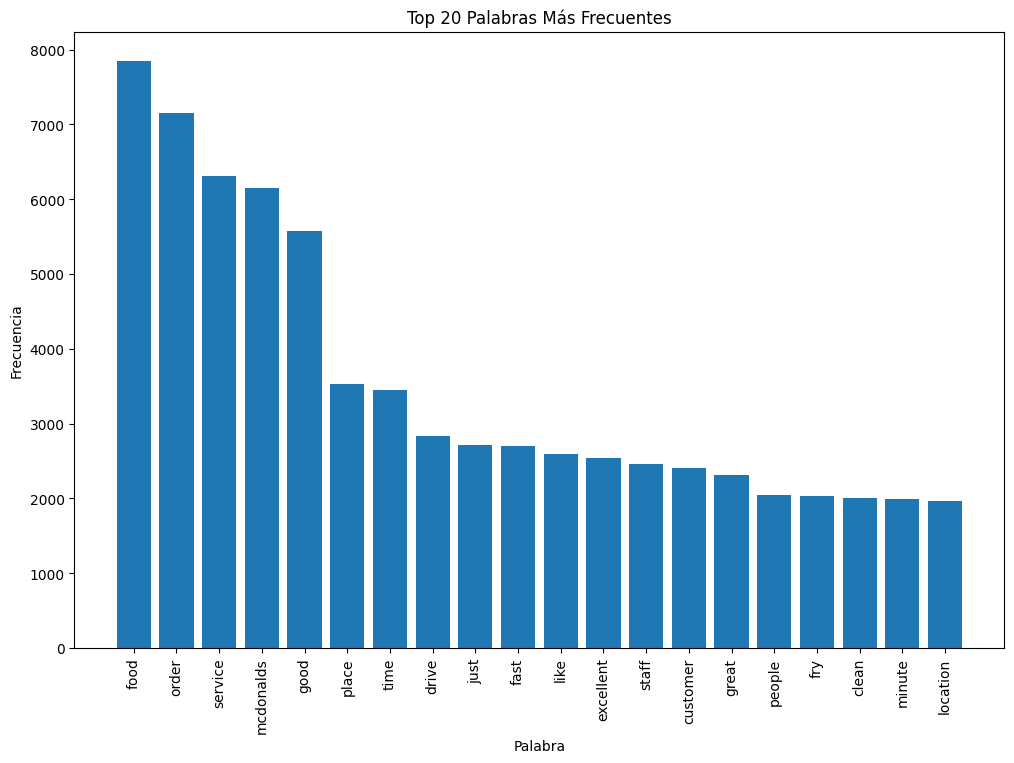

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
# Crear la matriz de Bag of Words
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df_fil['review'])

#Convertir la matriz a un DataFrame para contar la frecuencia de palabras
word_counts = X_bow.sum(axis=0).A1
words = vectorizer.get_feature_names_out()

# Crear un DataFrame con palabras y sus frecuencias
word_freq_df = pd.DataFrame({'word': words, 'frequency': word_counts})
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

# Graficar las palabras más frecuentes
plt.figure(figsize=(12, 8))
plt.bar(word_freq_df['word'][:20], word_freq_df['frequency'][:20])
plt.xticks(rotation=90)
plt.title('Top 20 Palabras Más Frecuentes')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.show()

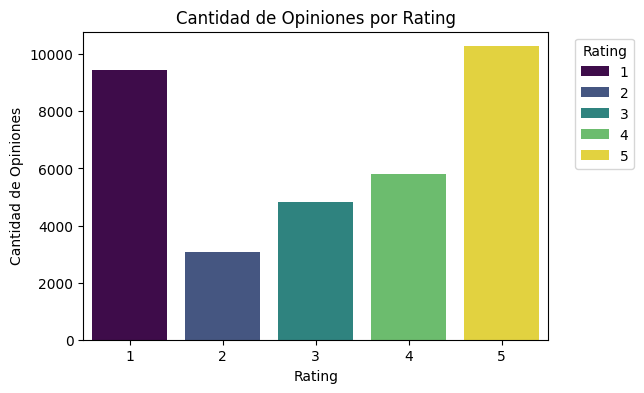

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la cantidad de opiniones por rating
rating_counts = df_fil['rating'].value_counts().sort_index().reset_index()
rating_counts.columns = ['rating', 'count']

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(data=rating_counts, x='rating', y='count', hue='rating', palette='viridis', dodge=False)

# Configurar el gráfico
plt.title('Cantidad de Opiniones por Rating')
plt.xlabel('Rating')
plt.ylabel('Cantidad de Opiniones')
#plt.xticks(ticks=rating_counts['rating'], labels=[f'{i} star' for i in rating_counts['rating']])
plt.legend(title='Rating', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


Tambien se puede hacer un analisis x region , para saber cuales son los lugares donde hay mas sentimiento negativo y positivo.

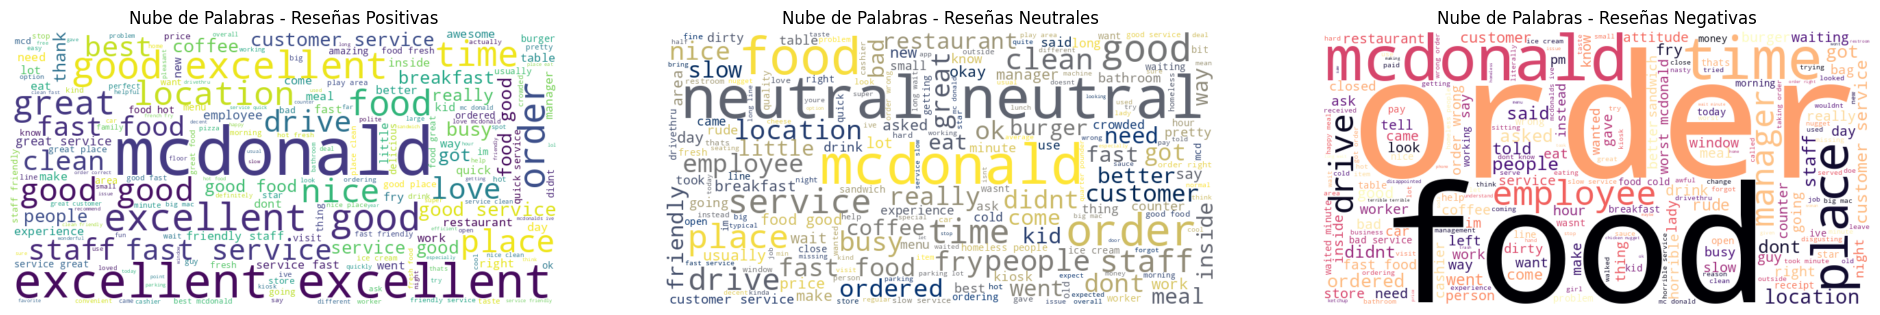

In [8]:
from wordcloud import WordCloud

# Dividir en reseñas positivas, neutrales y negativas
positive_reviews = df_fil[df_fil['rating'] >= 4]['review']
neutral_reviews = df_fil[df_fil['rating'] == 3]['review']
negative_reviews = df_fil[df_fil['rating'] <= 2]['review']

# Crear nubes de palabras
positive_text = ' '.join(positive_reviews)
neutral_text = ' '.join(neutral_reviews)
negative_text = ' '.join(negative_reviews)

positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(positive_text)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='cividis').generate(neutral_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(negative_text)

# Mostrar nubes de palabras
plt.figure(figsize=(24, 12))

plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Reseñas Positivas')

plt.subplot(1, 3, 2)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Reseñas Neutrales')

plt.subplot(1, 3, 3)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Reseñas Negativas')

plt.show()

Creacion de modelo BOW

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer

# Dividir en datos de entrenamiento y prueba
X = df_fil['review']
y = df_fil['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un pipeline de BoW con Naive Bayes
pipeline = make_pipeline(
    CountVectorizer(ngram_range=(1, 4)),  # Convertir texto en una matriz de conteo de palabras
    LogisticRegression(max_iter=1000)       # Clasificador Naive Bayes
)

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.704191616766467
Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.88      0.82      1898
           2       0.71      0.36      0.48       645
           3       0.63      0.50      0.56       939
           4       0.61      0.51      0.56      1146
           5       0.70      0.85      0.77      2052

    accuracy                           0.70      6680
   macro avg       0.69      0.62      0.64      6680
weighted avg       0.70      0.70      0.69      6680



Probe varios modelos como svm y bayes,este dio los mejores resultados.

In [10]:
# Probar el modelo con una frase
test_phrase = ['I hate the food of this place']
prediction = pipeline.predict(test_phrase)

print("Prediction for test phrase:", prediction[0])#resultado 1 estrella ,negativo


Prediction for test phrase: 1


In [11]:
# Definir las etiquetas positivas y negativas
# Considerar 1-2 estrellas como negativas y 4-5 estrellas como positivas
df_fil['sentiment'] = df_fil['rating'].apply(lambda x: 'positive' if x >= 4 else 'negative')

# Contar las reseñas positivas y negativas en el conjunto completo
print("Conteo de sentimientos en el conjunto completo:")
print(df_fil['sentiment'].value_counts())

# Contar las reseñas positivas y negativas en el conjunto de entrenamiento
print("\nConteo de sentimientos en el conjunto de entrenamiento:")
print(y_train.value_counts())

# Contar las reseñas positivas y negativas en el conjunto de prueba
print("\nConteo de sentimientos en el conjunto de prueba:")
print(y_test.value_counts())

Conteo de sentimientos en el conjunto completo:
sentiment
negative    17335
positive    16061
Name: count, dtype: int64

Conteo de sentimientos en el conjunto de entrenamiento:
rating
5    8222
1    7533
4    4641
3    3879
2    2441
Name: count, dtype: int64

Conteo de sentimientos en el conjunto de prueba:
rating
5    2052
1    1898
4    1146
3     939
2     645
Name: count, dtype: int64
